In [13]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt



In [14]:
test = xr.open_dataset('/Users/varyabazilova/Desktop/uu/0_teaching/Msc_students/Leon/Thesisfiles_Varya/climate/Era5/bagrot/swr/1973.nc')

test['ssrd_wm2'] = test.ssrd / (60*60)


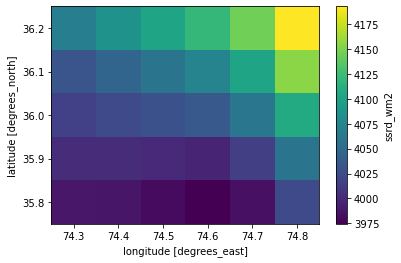

In [15]:
test['ssrd_wm2'].mean(dim = 'time').plot()

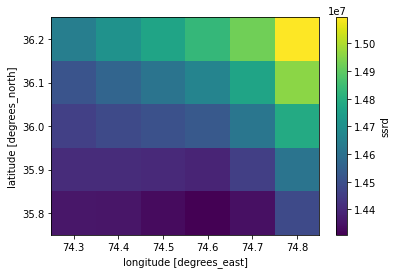

In [16]:
test['ssrd'].mean(dim = 'time').plot()

In [48]:
aws = pd.read_csv('/Users/varyabazilova/Desktop/paper2/202406_modelruns/model_runs_notebooks2/for_jacob/icimod_data/Kyangjin_ICIMOD.csv')

aws

,DATE,TIME,BVOL,PVOL,BCON,TAIR,RH,RHCOR,TCNR4,KINC,KUPW,LINC,LUPW,TSOIL,LSD,PRES,WSPD,WSPDmax,WINDDIR,SR50
0,2012-03-22,00:00,12.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2012-03-22,01:00,12.510000,0.0,105.240000,1.750000,43.670000,43.670000,-3.120000,2.240000,2.170000,211.520000,288.290000,7.17,0.0,639.280000,2.760000,NaN,94.400000,NaN
2,2012-03-22,02:00,12.510000,0.0,105.230000,2.160000,37.220000,37.220000,-2.630000,2.890000,2.050000,210.300000,288.250000,7.10,0.0,638.860000,2.050000,NaN,99.650000,NaN
3,2012-03-22,03:00,12.510000,0.0,105.240000,1.500000,37.780000,37.780000,-4.040000,4.250000,3.230000,206.820000,283.360000,7.01,0.0,638.570000,1.880000,NaN,61.970000,NaN
4,2012-03-22,04:00,12.510000,0.0,105.240000,1.220000,35.910000,35.910000,-3.380000,1.870000,1.870000,202.750000,283.590000,6.91,0.0,638.340000,2.250000,NaN,86.890000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101878,2023-11-06,12:00,14.235000,0.0,366.983333,4.960667,0.204167,0.204167,6.784500,873.166667,129.500000,241.666667,436.033333,NaN,NaN,642.466667,6.637000,6.964,244.869281,2.175900
101879,2023-11-06,13:00,14.235000,0.0,366.900000,4.952333,0.203833,0.203833,6.579167,789.733333,118.966667,242.350000,425.416667,NaN,NaN,641.933333,6.793333,7.245,247.071276,2.176667
101880,2023-11-06,14:00,14.243333,0.0,366.900000,4.355333,0.203167,0.203167,5.550167,632.433333,100.483333,243.333333,404.016667,NaN,NaN,641.800000,6.694333,7.286,245.145520,2.176667
101881,2023-11-06,15:00,14.246000,0.0,366.900000,3.430400,0.203000,0.203000,4.356800,370.220000,61.848000,257.260000,378.220000,NaN,NaN,641.660000,5.129200,6.288,243.626629,2.172400


In [49]:
aws['datetime'] = pd.to_datetime(aws['DATE'] + ' ' + aws['TIME'])
aws = aws.set_index('datetime')

In [50]:
monthly = aws.resample('M').mean()
monthly_mean = monthly.groupby(by=monthly.index.month).mean()
yearly_mean = monthly_mean.sum()


In [51]:
yearly_mean

BVOL        158.348355
PVOL          0.919767
BCON       3420.709534
TAIR         48.363566
RH          453.692313
RHCOR       327.968434
TCNR4        33.479873
KINC       2967.174688
KUPW        583.608041
LINC       3222.986611
LUPW       4073.650579
TSOIL        81.899236
LSD           0.876732
PRES       7682.983624
WSPD         31.686382
WSPDmax      39.873815
WINDDIR    2026.542154
SR50         25.325299
dtype: float64

In [52]:
climatepath = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/model_runs_notebooks2/for_jacob/langtang_climate_cut'
testfile = pd.read_csv(climatepath + '/12a/climatefile.12a.met')
testfile['D'] = pd.to_datetime(testfile['D'])
testfile = testfile.set_index('D')

In [53]:
monthly2 = testfile.resample('M').mean()
monthly_mean2 = monthly2.groupby(by=monthly2.index.month).mean()
# yearly_mean2 = monthly_mean2.sum()


In [54]:
monthly_mean2



,Pr,Ta,Rsw,N
D,,,,
1,0.068457,-9.325197,3168.425386,0.392582
2,0.105060,-8.966811,3732.170720,0.441575
3,0.096041,-6.208020,4657.249802,0.413902
4,0.115023,-2.763002,5273.894073,0.440877
5,0.246063,1.063518,5111.661909,0.545076
6,0.528898,4.746332,4195.553429,0.753423
7,0.923206,5.960038,3169.413283,0.952909
8,0.773175,5.723644,3249.942877,0.942722
9,0.419944,4.017048,3497.403083,0.776071


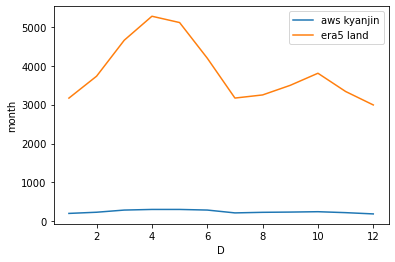

In [58]:
monthly_mean.KINC.plot(label = 'aws kyanjin')

monthly_mean2.Rsw.plot(label = 'era5 land')
plt.ylabel('W/m2 (mean monthly)')
plt.ylabel('month')

plt.legend()

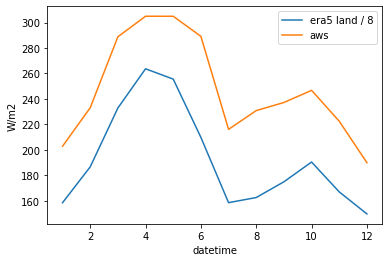

In [69]:
monthly_mean2['Rsw2'] = monthly_mean2.Rsw / 20
monthly_mean2.Rsw2.plot(label = 'era5 land / 8')


monthly_mean.KINC.plot(label = 'aws')
plt.ylabel('W/m2')

plt.legend()

<AxesSubplot:xlabel='datetime'>

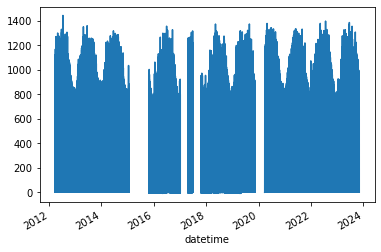

In [59]:
aws.KINC.plot()